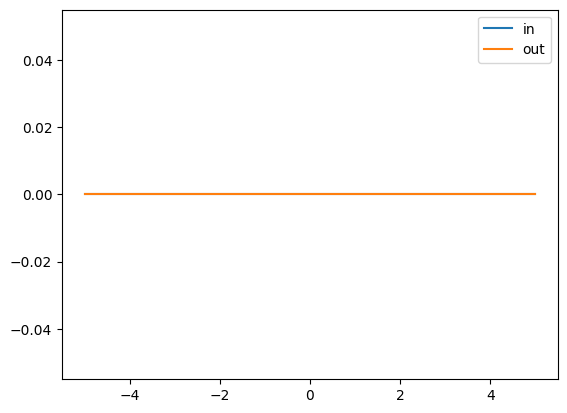

/tmp/ipykernel_1752/3391952368.py:53: RuntimeWarning: invalid value encountered in scalar divide
  gamma_in = psi_in_prime / psi_in[-2]
/tmp/ipykernel_1752/3391952368.py:54: RuntimeWarning: invalid value encountered in scalar divide
  gamma_out = psi_out_prime / psi_out[-2]


TypeError: only integer scalar arrays can be converted to a scalar index

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Mass of the particle
m = 2000

# Discretization parameters
L = 5.0
h = 0.1
x = np.linspace(-L, L, int(2*L/h) + 1)
epsilon = 1e-5

def V_anharmonic(x):
    # Potential function
    return 0.5*(C*x**2 - D*x**3 + E*x**4)


def numerov_method(x, En):
    # Numerov method

    # Second derivative term
    F = 2.0 * m * (En - V_anharmonic(x))

    # Initialize wavefunction
    psi_in = np.zeros_like(x)
    psi_in[0], psi_in[1] = 0.0, epsilon
    psi_out = np.copy(psi_in)

    # outward iteration
    for i in range(int(len(x)/2) + 3):
        psi_out[i+1] = (psi_out[i] * (2 + 10 * h**2 * F[i] / 12) 
                       - psi_out[i-1] * (1 - h**2 * F[i-1] / 12)) / (1 - h**2 * F[i+1] / 12)

    # inward iteration
    F = F[::-1]
    for i in range(int(len(x)/2) + 3):
        psi_in[i+1] = (psi_in[i] * (2 + 10 * h**2 * F[i] / 12) 
                       - psi_in[i-1] * (1 - h**2 * F[i-1] / 12)) / (1 - h**2 * F[i+1] / 12)

    #plot
    plt.plot(x, psi_in, label='in')
    plt.plot(x, psi_out, label='out')
    plt.legend()
    plt.show()

    # first derivative of psi at x = 0 using central difference
    psi_in_prime = (-psi_in[-1] + 8 * psi_in[-2] 
                    - 8 * psi_in[-4] + 8 * psi_in[-5]) / (12 * h)
    
    psi_out_prime = (-psi_out[-1] + 8 * psi_out[-2] 
                    - 8 * psi_out[-4] + 8 * psi_out[-5]) / (12 * h)
    
    gamma_in = psi_in_prime / psi_in[-2]
    gamma_out = psi_out_prime / psi_out[-2]
    delta = abs(gamma_in - gamma_out)

    while delta > 0.001:
        En += 1e-5
        print(En)
        psi = numerov_method(x, En)
    
    psi = np.concatenate(psi_out[:-2], psi_in[-3::-1])
    psi /= np.sqrt(np.sum(psi**2 * h))
    psi *= np.sqrt(2 * m * En) * h
    return En, psi

# Potential constants
C, D, E = 1500 * 12137804.1108138 * 5.29177210903e-11, 0.0, 0.0

En, psi = numerov_method(x, 0.5)


[0.0, 0.0, 0.0, 0.0, 0.0] [array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, 

/tmp/ipykernel_1752/2717499031.py:47: RuntimeWarning: invalid value encountered in scalar divide
  gamma_in = psi_in_prime / psi_in[-2]
/tmp/ipykernel_1752/2717499031.py:48: RuntimeWarning: invalid value encountered in scalar divide
  gamma_out = psi_out_prime / psi_out[-2]
/tmp/ipykernel_1752/2717499031.py:57: RuntimeWarning: divide by zero encountered in divide
  psi /= np.sqrt(np.sum(psi**2 * h))
/tmp/ipykernel_1752/2717499031.py:57: RuntimeWarning: invalid value encountered in divide
  psi /= np.sqrt(np.sum(psi**2 * h))


ValueError: x and y must have same first dimension, but have shapes (101,) and (201,)

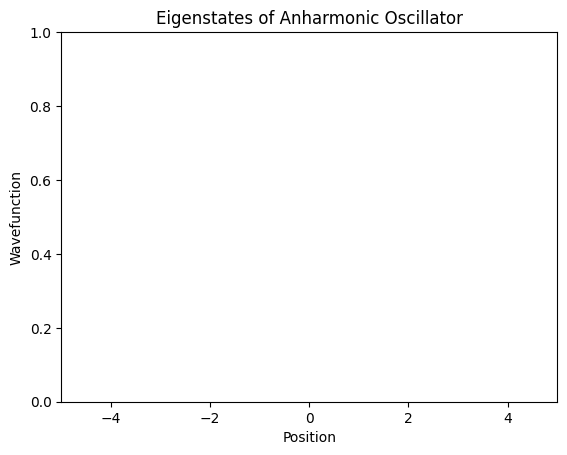

In [ ]:
# Number of eigenstates to compute
num_eigenstates = 5

# Compute eigenenergies and eigenstates
eigenenergies = []
eigenstates = []

E_init = 0.0

for n in range(num_eigenstates):

    # Solve Schrödinger equation using Numerov method
    E_init, psi = numerov_method(x, E_init)

    # Normalize wavefunction
    psi /= np.sqrt(np.sum(psi**2 * h))

    # Store eigenenergy and eigenstate
    eigenenergies.append(E_init)
    eigenstates.append(psi)

# Plot eigenstates
plt.figure()
plt.xlabel('Position')
plt.ylabel('Wavefunction')
plt.xlim(-L, L)

print(eigenenergies, eigenstates)

plt.title('Eigenstates of Anharmonic Oscillator')
for n in range(num_eigenstates):
    plt.plot(x, eigenstates[n], label=f'E_{n} = {eigenenergies[n]:.2f}')
    plt.legend()
    plt.show()